# Red Neuronal Densa TensorFlow

## Predicción de Prestamo de Loan Prediction Dataset

### Ángel Isaac Gómez Canales

## Paso 1. Importar paquetería necesaria 📦

In [120]:
# Paqueteria basica
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tensorflow y keras
import tensorflow as tf
from tensorflow import keras

# Funcionalidades basicas de sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Paso 2. Cargar los datos 💾

In [121]:
data = pd.read_csv("../Datasets/loan_prediction.csv")  # Cambiar la ruta a la adecuada

## Paso 3. Inspeccionar los datos 🔎

A continuacion se muestran los primeros 5 datos del datset para observar el formato que tienen los datos

In [122]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [123]:
data.shape

(614, 6)

Información del Dataset para conocer sus columnas y  ver si tiene valores nulos que se deban eliminar

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 28.9 KB


In [125]:
data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

De aquí vemos que el dataset está completo, no tiene valores nulos que sea necesario eliminar,
Ahora mostramos las estadisticas de los datos para ver si es necesario escalarlos.
La última columna no contiene datos por lo que será necesario eliminarla

In [126]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616,0.687296
std,6109.041673,2926.248369,88.340630,82.183884,0.418832,0.463973
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


Se observa que hay columnas que toman valores en el orden de $10^{2}$, mientras que otras toman valores en el rango de $10^{4}$, por lo que será necesario escalar los datos.

Por último, veamos que valores toma la columna target (diagnosis)

In [127]:
data["Loan_Status"].unique()

array([1, 0])

Vemos que toma valores de 0 y 1, por lo que ya no será necesario codificar

## Paso 3. Preprocesamiento de los datos 🛠️

Checamos el porcentaje de prestamos aprobados y no aprobados para ver si el dataset está balanceado

In [128]:
n_aprob = data["Loan_Status"].sum()
print(f"El número de diagnosticos malignos es de {n_aprob / len(data)}")

El número de diagnosticos malignos es de 0.6872964169381107


Aunque hay más registros aprobados, el dataset no parece tan desbalanceado, por lo que podemos seguir

A continuación, separamos las variables de entrada de las salidas

In [129]:
X = data.drop(columns="Loan_Status")
Y = data["Loan_Status"].to_numpy()

El siguiente paso es escalar los datos para que tengan rangos similares y poder entrenar la red de mejor manera

In [130]:
X = StandardScaler().fit_transform(X)

Finalmente, particionamos los datos con el 90% para entrenamiento y el 10% para prueba

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# Paso 4. Diseñar Red Neuronal 👨‍💻

In [162]:
model = keras.Sequential()
model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(), input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.L1L2(0.001)))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.legacy.Adam(), metrics=["accuracy"])

In [163]:
# Resumen del modelo
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 20)                120       
                                                                 
 dense_96 (Dense)            (None, 1)                 21        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


## Paso 5. Entrenar la Red Neuronal 🧠💪

In [164]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=1, validation_split=0.1)

Epoch 1/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7318 - accuracy: 0.5020 - val_loss: 0.7023 - val_accuracy: 0.6071
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7034 - accuracy: 0.5907 - val_loss: 0.6771 - val_accuracy: 0.7143
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.6835 - val_loss: 0.6556 - val_accuracy: 0.7321
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.7218 - val_loss: 0.6371 - val_accuracy: 0.7321
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.7520 - val_loss: 0.6215 - val_accuracy: 0.7321
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6253 - accuracy: 0.7601 - val_loss: 0.6082 - val_accuracy: 0.7500
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.7621 - val_loss: 0.5958 - val_accuracy: 0.7679
Epoch 8/100
1

Epoch 59/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.7762 - val_loss: 0.5329 - val_accuracy: 0.7857
Epoch 60/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.7762 - val_loss: 0.5329 - val_accuracy: 0.7857
Epoch 61/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5364 - accuracy: 0.7762 - val_loss: 0.5329 - val_accuracy: 0.7857
Epoch 62/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5362 - accuracy: 0.7762 - val_loss: 0.5326 - val_accuracy: 0.7857
Epoch 63/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7762 - val_loss: 0.5324 - val_accuracy: 0.7857
Epoch 64/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.7762 - val_loss: 0.5322 - val_accuracy: 0.7857
Epoch 65/100
16/16 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.7762 - val_loss: 0.5316 - val_accuracy: 0.7857
Epoch 

Graficamos ahora las curvas de aprendizaje para un mejor diagnóstico del aprendizaje

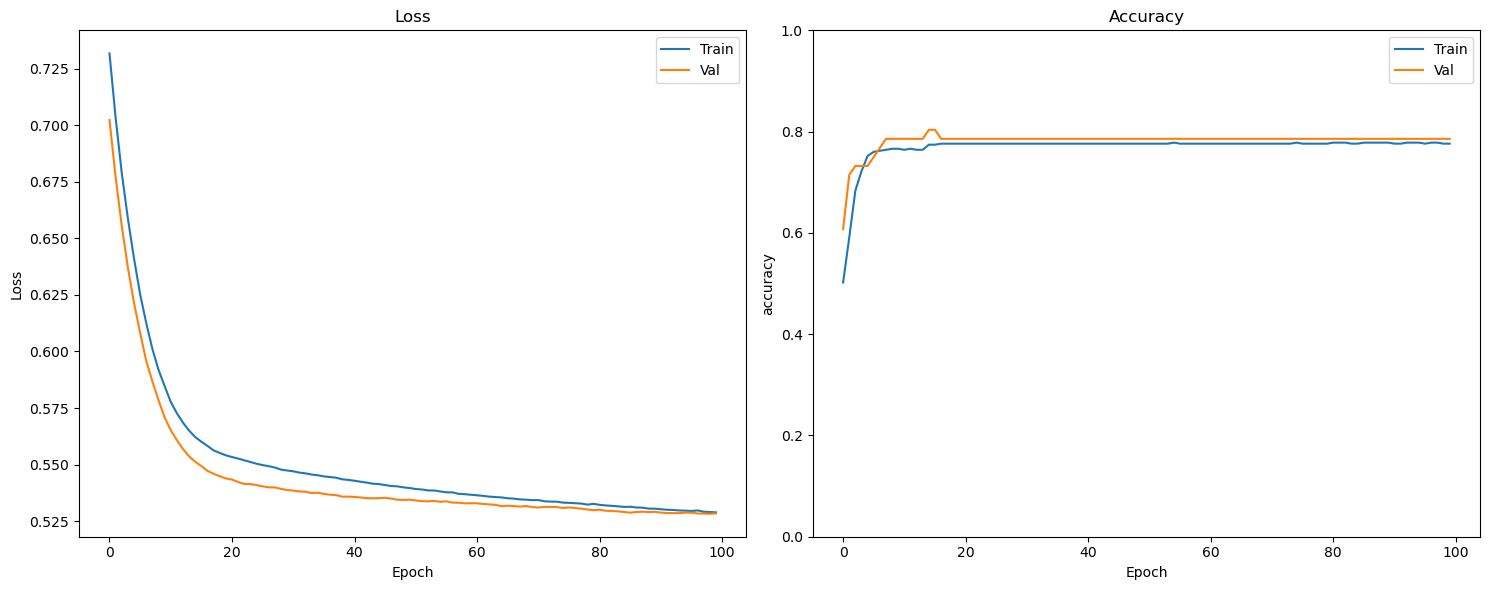

In [165]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label="Train")
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val')
    #plt.yscale('log')
    plt.legend()

    plt.subplot(122)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="Train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val')
    plt.ylim([0,1])
    plt.legend()
    plt.tight_layout()
    plt.show()
     
plot_history(history)

## Paso 6. Evaluar el modelo con el test set

Reporte de Clasificación

In [166]:
Y_pred = (model.predict(X_test) > 0.5) * 1
print(classification_report(Y_test, Y_pred, target_names=("No aprobado", "Aprobado")))

2/2 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

 No aprobado       0.65      0.50      0.56        22
    Aprobado       0.76      0.85      0.80        40

    accuracy                           0.73        62
   macro avg       0.70      0.68      0.68        62
weighted avg       0.72      0.73      0.72        62



Matriz de Confusión


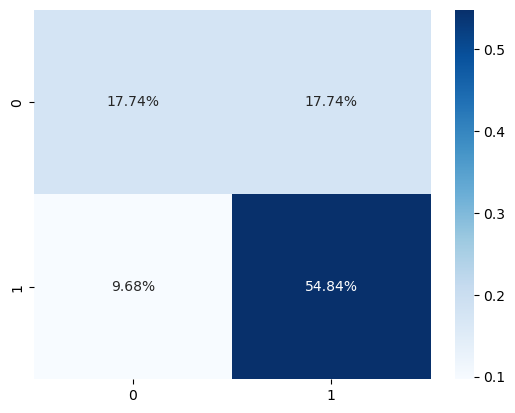

In [167]:
cm = confusion_matrix(Y_test, Y_pred)
_ = sns.heatmap(cm/np.sum(cm), fmt="0.2%", annot=True, cmap='Blues')